In [7]:
import os
import codecs,sys
import pandas as pd

In [2]:
def getContent(filepath):
    f = codecs.open(filepath, 'r', 'utf-8')
    content = f.readline()
    f.close()
    return content

In [3]:
folders = ['正面','负面']
for each_fold in folders:
    outp = '2000_' + each_fold + '.txt'
    output = codecs.open(outp,'w','utf-8')
    rootdir = './'+ each_fold
    for parent,dirnames,filenames in os.walk(rootdir):
        for filename in filenames: 
            content = getContent(rootdir + '/' + filename)
            output.writelines(content + '\n')
    output.close()

In [4]:
pos = codecs.open('./2000_正面.txt', 'r', 'utf-8').readlines()
neg = codecs.open('./2000_负面.txt', 'r', 'utf-8').readlines()

In [5]:
y_pos =  [1]*len(pos)
y_neg = [0]*len(neg)

In [8]:
pos.extend(neg)
y_pos.extend(y_neg)
pos = pd.DataFrame(data=pos,columns=['text'])
y_pos = pd.DataFrame(data=y_pos,columns=['label'])
train = pd.concat([pos,y_pos],axis=1)

In [9]:
train.head()

,text,label
0,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较...",1
1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!\r\n,1
2,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。\r\n,1
3,宾馆在小街道上，不大好找，但还好北京热心同胞很多~\r\n,1
4,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风\r\n",1


In [10]:
from sklearn.utils import shuffle
df = shuffle(train)
df.head()

,text,label
2638,可以这样评价是我们住过的最差的酒店，简陋的大堂，肮脏的房间，可怕的卫生间，绝对是一场恶梦！！...,0
1725,"酒店的地理位置不错,出门就是公园,就是房间偏小,早餐还可以.\r\n",1
2762,唯一找到的优点就是机顶盒比较先进，不过电视会突然没有声音。。打电话报修，竟来了位lady，根...,0
4877,房间设施象招待所，卫生间里的设备很久，房间的卫生很差\r\n,0
4894,离海边很近，但是房间的装修已经不是很新（海景房，1号楼），老式的宾馆，老式的服务。适合要求方...,0


In [11]:
df.shape

(6000, 2)

In [12]:
import jieba
df['words'] = df['text'].map(lambda x: ' '.join(jieba.cut(x)))
df.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\DELL\AppData\Local\Temp\jieba.cache
Loading model cost 0.630 seconds.
Prefix dict has been built succesfully.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,text,label,words
2638,可以这样评价是我们住过的最差的酒店，简陋的大堂，肮脏的房间，可怕的卫生间，绝对是一场恶梦！！...,0,可以 这样 评价 是 我们 住 过 的 最差 的 酒店 ， 简陋 的 大堂 ， 肮脏 的 房...
1725,"酒店的地理位置不错,出门就是公园,就是房间偏小,早餐还可以.\r\n",1,"酒店 的 地理位置 不错 , 出门 就是 公园 , 就是 房间 偏小 , 早餐 还 可以 ...."
2762,唯一找到的优点就是机顶盒比较先进，不过电视会突然没有声音。。打电话报修，竟来了位lady，根...,0,唯一 找到 的 优点 就是 机顶盒 比较 先进 ， 不过 电视 会 突然 没有 声音 。 。...
4877,房间设施象招待所，卫生间里的设备很久，房间的卫生很差\r\n,0,房间 设施 象 招待所 ， 卫生间 里 的 设备 很 久 ， 房间 的 卫生 很差 \r\n
4894,离海边很近，但是房间的装修已经不是很新（海景房，1号楼），老式的宾馆，老式的服务。适合要求方...,0,离 海边 很近 ， 但是 房间 的 装修 已经 不是 很 新 （ 海景房 ， 1 号楼 ） ...


In [23]:
df['text_legth'] = df['words'].map(lambda x: len(x))

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(array([4.341e+03, 1.147e+03, 3.070e+02, 1.250e+02, 3.900e+01, 1.600e+01,
        1.200e+01, 4.000e+00, 3.000e+00, 6.000e+00]),
 array([   5. ,  165.6,  326.2,  486.8,  647.4,  808. ,  968.6, 1129.2,
        1289.8, 1450.4, 1611. ]),
 <a list of 10 Patch objects>)

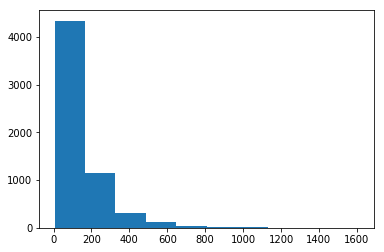

In [32]:
import matplotlib.pyplot as plt
plt.hist(df['text_legth'])

In [13]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(filters='!！“”"#$%&（）()*+,，-.。/:：;<=>?？@[\]^_`{|}~\t\n、\r1234567890')
tokenizer.fit_on_texts(df['words'])
df['seq'] = tokenizer.texts_to_sequences(df['words'])
len(tokenizer.word_counts)

D:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


13459

In [52]:
for word,i in tokenizer.word_index.items():
    print (word + '  ' + str(i))

的  1
了  2
酒店  3
是  4
房间  5
我  6
很  7
也  8
在  9
不  10
住  11
都  12
有  13
没有  14
还  15
服务  16
就  17
入住  18
好  19
说  20
到  21
和  22
不错  23
去  24
比较  25
我们  26
可以  27
感觉  28
携程  29
前台  30
非常  31
给  32
但  33
要  34
差  35
就是  36
设施  37
早餐  38
还是  39
一个  40
服务员  41
人  42
这个  43
方便  44
一般  45
晚上  46
价格  47
元  48
过  49
但是  50
宾馆  51
而且  52
没  53
里  54
小  55
房  56
让  57
又  58
才  59
后  60
上  61
环境  62
太  63
客人  64
时  65
这  66
他们  67
不是  68
不好  69
再  70
这家  71
个  72
来  73
不过  74
因为  75
大  76
点  77
什么  78
态度  79
你  80
居然  81
干净  82
用  83
对  84
还有  85
不能  86
下次  87
实在  88
多  89
装修  90
地方  91
如果  92
时候  93
卫生间  94
这样  95
该  96
知道  97
不会  98
被  99
陈旧  100
这里  101
会  102
预定  103
有点  104
竟然  105
；  106
位置  107
所以  108
选择  109
结果  110
月  111
大堂  112
发现  113
不要  114
旧  115
从  116
空调  117
订  118
比  119
把  120
退房  121
以后  122
能  123
着  124
离  125
最  126
标准  127
其他  128
看  129
换  130
等  131
星  132
交通  133
楼  134
吃  135
自己  136
日  137
只有  138
已经  139
要求  140
隔音  141
算  142
一  143
特别  144
人员  145
与  146
很差  147


晚饭  2166
鱼  2167
接下来  2168
中餐  2169
喷  2170
价格合理  2171
没住  2172
现场  2173
旺角  2174
枕套  2175
冷水  2176
冷热水  2177
看过  2178
好久  2179
擅自  2180
巨大  2181
对比  2182
高架  2183
牛  2184
无锡  2185
不得了  2186
窗口  2187
闹钟  2188
卧室  2189
栈桥  2190
进屋  2191
不堪  2192
吵死  2193
答  2194
始终  2195
不远处  2196
莫泰  2197
丰盛  2198
通道  2199
关键  2200
经济性  2201
破洞  2202
地下室  2203
排  2204
排队  2205
侍应  2206
小事  2207
湖景  2208
就餐  2209
对待  2210
狗狗  2211
广告  2212
长宁路  2213
发  2214
万丽  2215
搞好  2216
发脾气  2217
旅行团  2218
菸  2219
厉害  2220
双人  2221
桑拿  2222
河南人  2223
坡  2224
累  2225
同等  2226
没敢  2227
这位  2228
兜  2229
還是  2230
喜来登  2231
一台  2232
地区  2233
相对来说  2234
港币  2235
跟前  2236
泉州  2237
在外  2238
实用  2239
之处  2240
地说  2241
两位  2242
带来  2243
惨不忍睹  2244
拎  2245
污迹  2246
卡拉  2247
来不及  2248
免得  2249
体现  2250
好评  2251
真实  2252
指示  2253
干脆  2254
两只  2255
世纪  2256
路过  2257
传说  2258
可恶  2259
挑  2260
很久  2261
不理  2262
往来  2263
赶快  2264
打出  2265
为何  2266
馒头  2267
苍蝇  2268
夜里  2269
关掉  2270
乱七八糟  2271
泰安  2272
闹市区  2273
副  2274
平方米  2275
虽

目睹  4847
同层  4848
发展  4849
耍  4850
早已  4851
医疗  4852
一千多  4853
亏死  4854
同期  4855
说时  4856
不可抗力  4857
迫降  4858
连夜  4859
环境优美  4860
大方  4861
一盒  4862
中西亚  4863
相仿  4864
其为  4865
收下来  4866
上手  4867
盘中  4868
取用  4869
远点  4870
弧度  4871
带我去  4872
离海  4873
点播  4874
手提电脑  4875
视频  4876
冤枉  4877
大陆  4878
上网卡  4879
鱼疗  4880
签了  4881
吃个  4882
起价  4883
露宿街头  4884
四日游  4885
失误  4886
拧  4887
熱水  4888
著名  4889
天后  4890
無煙  4891
億  4892
煙民  4893
此起彼伏  4894
电话声  4895
入耳  4896
三四个  4897
朝内  4898
出奇  4899
印记  4900
还算大  4901
打消  4902
念头  4903
髒  4904
合作伙伴  4905
大呼  4906
多盖床  4907
自然环境  4908
不幸  4909
洗面盆  4910
出头  4911
牛羊肉  4912
尾随  4913
乱字  4914
新楼  4915
房小  4916
正巧  4917
斩客  4918
地毡  4919
恐布  4920
差劣  4921
杂物间  4922
敞着  4923
别提  4924
推土机  4925
脏布  4926
内线  4927
转接  4928
市容  4929
和谐  4930
克制  4931
福建  4932
言过其实  4933
清明  4934
高高兴兴  4935
算得  4936
升级成  4937
声明  4938
弥漫着  4939
太暗  4940
两年  4941
纯净  4942
配给  4943
未经  4944
印尼  4945
雅加达  4946
配制  4947
捡  4948
短短  4949
拆开  4950
翻看  4951
拿纸  4952
振振有词  4953
值钱  4

游泳衣  7665
什邡  7666
象样  7667
说不上  7668
宁静  7669
白问  7670
苛求  7671
文物  7672
伪满  7673
时期  7674
曲折  7675
曼哈顿  7676
建联  7677
公仔  7678
抄家  7679
鸡犬不宁  7680
闹到  7681
好又多  7682
星有  7683
向阳  7684
同价  7685
首都  7686
空港  7687
需交  7688
高低  7689
正理  7690
交款  7691
一不小心  7692
摔碎  7693
阴毛  7694
省市  7695
故宫  7696
大半天  7697
时多收  7698
先讲  7699
他人  7700
二号楼  7701
yuan  7702
液镜  7703
粗心大意  7704
单从  7705
间接  7706
正式  7707
大商  7708
立着  7709
行带  7710
朗  7711
豪  7712
朗庭  7713
嫌小  7714
免税店  7715
抵价券  7716
受宠若惊  7717
橡木  7718
不多见  7719
游回来  7720
游个泳  7721
赏心悦目  7722
咱  7723
别涨  7724
驻马店  7725
尊敬  7726
空空  7727
转换  7728
后备  7729
替换  7730
木纹  7731
砖石  7732
要略  7733
对会  7734
产权  7735
超低  7736
个山  7737
血迹斑斑  7738
赞成  7739
变态  7740
收录  7741
混扰  7742
讲过  7743
赞一赞  7744
通往  7745
横流  7746
事宜  7747
解答  7748
屡屡  7749
视为  7750
分辨  7751
适时地  7752
冰  7753
柠檬茶  7754
畅谈  7755
尤  7756
奇瑞  7757
供货商  7758
居多  7759
清泥洼  7760
mini  7761
平吧  7762
韩  7763
港  7764
从前  7765
婴儿床  7766
符合国际  7767
潮流  7768
发不出  7769
前人  7770
晚报  7771
餐巾  77

敷衍了事  10626
不包  10627
挺旧  10628
一大跳  10629
面包房  10630
办离店  10631
对天发誓  10632
时不含  10633
淑  10634
时好时坏  10635
浴池  10636
扔进  10637
带有  10638
四百  10639
泰和  10640
时先  10641
未整理  10642
先办  10643
因急  10644
川沙  10645
蔡陆线  10646
较为简单  10647
点多钟  10648
悔  10649
连小  10650
小处  10651
离江近  10652
维多利亚  10653
应是  10654
加盟店  10655
更上一层楼  10656
零乱  10657
腐霉  10658
不翼而飞  10659
但此  10660
非人  10661
小房间  10662
令人费解  10663
大不了  10664
不写  10665
黑龙江  10666
基于  10667
齐齐哈尔  10668
不旺  10669
东向西  10670
标志性  10671
保护环境  10672
草草  10673
皱巴巴  10674
武义  10675
新宇  10676
明招  10677
三粒  10678
花钱买  10679
老土  10680
安阳  10681
中原  10682
上线  10683
提示音  10684
部队  10685
军人  10686
早操  10687
操操  10688
操  10689
怪事  10690
特浓  10691
大马力  10692
鼓风机  10693
蚊  10694
共舞  10695
打是  10696
鳶飞  10697
阎蕾  10698
这地  10699
刷预  10700
锈迹  10701
不多远  10702
广深  10703
这所  10704
永不  10705
途中  10706
最佳  10707
梅苑  10708
知晓  10709
才刚  10710
无法解释  10711
逗留  10712
荒谬  10713
亏损  10714
之名  10715
日后  10716
名目  10717
亏待  10718
动气  10719
争取  10720
另一方面  10721

水力  13164
非得  13165
烧来  13166
络腮胡子  13167
很怪  13168
浅  13169
垂下来  13170
底部  13171
下部  13172
只敢  13173
強求  13174
什麼  13175
陳  13176
自古  13177
交通要道  13178
街道  13179
同胞  13180
新装  13181
改水单  13182
改过来  13183
no  13184
设法  13185
订票  13186
yz  13187
瘦  13188
洗湖  13189
个园  13190
何园  13191
蛋糕店  13192
离后  13193
酒吧街  13194
泡吧  13195
主机  13196
攴  13197
癫  13198
善  13199
ゴ  13200
怢  13201
t  13202
嶱  13203
宎  13204
憩  13205
陇  13206
婓  13207
锋  13208
眒  13209
嶲  13210
湮  13211
仅竭  13212
船腔挲  13213
媪  13214
散奥祥  13215
湮散  13216
竭船  13217
陶  13218
お  13219
斮  13220
疶  13221
挲  13222
硐  13223
猁  13224
芵  13225
綎  13226
斓  13227
仅憩  13228
稛  13229
茞  13230
淩  13231
桸  13232
酕  13233
肴  13234
仅猁  13235
毞  13236
豖  13237
滇腔  13238
r  13239
疑祥  13240
饶  13241
弇  13242
冲淋  13243
北师大  13244
留意  13245
西四  13246
公交站  13247
省事  13248
报刊  13249
水果摊  13250
应有尽有  13251
窗头  13252
柜后  13253
烟酒  13254
店里  13255
订如家  13256
经路店  13257
夹被  13258
警惕  13259
外套  13260
盯上  13261
掏  13262
口袋  13263
好心  13264
平常  13265
没套 

In [14]:
word_count = len(tokenizer.word_counts)

In [15]:
df.head()

,text,label,words,seq
2638,可以这样评价是我们住过的最差的酒店，简陋的大堂，肮脏的房间，可怕的卫生间，绝对是一场恶梦！！...,0,可以 这样 评价 是 我们 住 过 的 最差 的 酒店 ， 简陋 的 大堂 ， 肮脏 的 房...,"[27, 95, 294, 4, 26, 11, 49, 1, 235, 1, 3, 481..."
1725,"酒店的地理位置不错,出门就是公园,就是房间偏小,早餐还可以.\r\n",1,"酒店 的 地理位置 不错 , 出门 就是 公园 , 就是 房间 偏小 , 早餐 还 可以 ....","[3, 1, 198, 23, 598, 36, 1328, 36, 5, 2739, 38..."
2762,唯一找到的优点就是机顶盒比较先进，不过电视会突然没有声音。。打电话报修，竟来了位lady，根...,0,唯一 找到 的 优点 就是 机顶盒 比较 先进 ， 不过 电视 会 突然 没有 声音 。 。...,"[335, 534, 1, 453, 36, 6924, 25, 2351, 74, 307..."
4877,房间设施象招待所，卫生间里的设备很久，房间的卫生很差\r\n,0,房间 设施 象 招待所 ， 卫生间 里 的 设备 很 久 ， 房间 的 卫生 很差 \r\n,"[5, 37, 416, 246, 94, 54, 1, 454, 7, 724, 5, 1..."
4894,离海边很近，但是房间的装修已经不是很新（海景房，1号楼），老式的宾馆，老式的服务。适合要求方...,0,离 海边 很近 ， 但是 房间 的 装修 已经 不是 很 新 （ 海景房 ， 1 号楼 ） ...,"[125, 912, 433, 50, 5, 1, 90, 139, 68, 7, 298,..."


In [16]:
from keras.preprocessing.sequence import pad_sequences
df['seq_pad'] = list(pad_sequences(df['seq'], maxlen=1000))

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
df['seq_pad'][200]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [19]:
import numpy as np
y = df.label
X = np.array(list(df['seq_pad']))

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X,y, random_state = 2018,test_size = 0.3)

In [20]:
x_train.shape

(4200, 1000)

In [21]:
y_val.shape

(1800,)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout, Embedding
model = Sequential()
model.add(Embedding(word_count+1, 256, input_length = 1000))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train,y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Train on 4200 samples, validate on 1800 samples
Epoch 1/10
4200/4200 [==============================] - 447s 107ms/step - loss: 0.1562 - val_loss: 0.1116
Epoch 2/10
4200/4200 [==============================] - 519s 124ms/step - loss: 0.0598 - val_loss: 0.0832
Epoch 3/10
4200/4200 [==============================] - 571s 136ms/step - loss: 0.0375 - val_loss: 0.0757
Epoch 4/10
4200/4200 [==============================] - 1664s 396ms/step - loss: 0.0272 - val_loss: 0.0772
Epoch 5/10
4200/4200 [==============================] - 864s 206ms/step - loss: 0.0194 - val_loss: 0.0755
Epoch 6/10
4200/4200 [==============================] - 648s 154ms/step - loss: 0.0154 - val_loss: 0.0683
Epoch 7/10
4200/4200 [==============================] - 2040s 486ms/step - loss: 0.0127 - val_loss: 0.0673
Epoch 8/10
4200/4200 [==============================] - 2372s 565ms/step - loss: 0.0103 - val_loss: 0.0705
Epoch 9/10
4200/4200 [==============================] - 2580s 614ms/step - loss: 0.0086 - val_loss: 0

In [93]:
model = Sequential()
model.add(Embedding(word_count+1, 256, input_length = 50))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Train on 2767 samples, validate on 1187 samples
Epoch 1/10
2767/2767 [==============================] - 9s 3ms/step - loss: 0.5698 - acc: 0.6910 - val_loss: 0.3696 - val_acc: 0.8585
Epoch 2/10
2767/2767 [==============================] - 8s 3ms/step - loss: 0.2449 - acc: 0.9060 - val_loss: 0.3094 - val_acc: 0.8719
Epoch 3/10
2767/2767 [==============================] - 8s 3ms/step - loss: 0.1520 - acc: 0.9458 - val_loss: 0.3336 - val_acc: 0.8652
Epoch 4/10
2767/2767 [==============================] - 8s 3ms/step - loss: 0.0601 - acc: 0.9790 - val_loss: 0.3930 - val_acc: 0.8728
Epoch 5/10
2767/2767 [==============================] - 8s 3ms/step - loss: 0.0419 - acc: 0.9870 - val_loss: 0.7332 - val_acc: 0.8644
Epoch 6/10
2767/2767 [==============================] - 11s 4ms/step - loss: 0.0524 - acc: 0.9859 - val_loss: 0.6144 - val_acc: 0.8627
Epoch 7/10
2767/2767 [==============================] - 12s 4ms/step - loss: 0.0182 - acc: 0.9949 - val_loss: 0.5844 - val_acc: 0.8686
Epoch 8/10
2

In [47]:
from gensim.models.word2vec import Word2Vec
sogou_w2v = Word2Vec.load(r'D:\NLP\sougou_word2vec\sogou.model')

In [54]:
embeddings_matrix = np.zeros((word_count+1, 400))
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = sogou_w2v[word]
        embeddings_matrix[i] = embedding_vector
    except:
        pass        

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [59]:
embeddings_matrix[1].shape

(400,)

In [1]:
model = Sequential()
model.add(Embedding(word_count+1, 400, weights=[embeddings_matrix], input_length=1000, trainable=False))
model.add(LSTM(256)) 
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=64, epochs=20, validation_data=(x_val, y_val))

NameError: name 'Sequential' is not defined

In [64]:
model = Sequential()
model.add(Embedding(word_count+1, 400, weights=[embeddings_matrix], input_length=1000, trainable=True))
model.add(LSTM(256)) 
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Train on 4200 samples, validate on 1800 samples
Epoch 1/10
4200/4200 [==============================] - 566s 135ms/step - loss: 0.4247 - acc: 0.8000 - val_loss: 0.3403 - val_acc: 0.8633
Epoch 2/10
4200/4200 [==============================] - 568s 135ms/step - loss: 0.2183 - acc: 0.9210 - val_loss: 0.2510 - val_acc: 0.9078
Epoch 3/10
4200/4200 [==============================] - 569s 135ms/step - loss: 0.1241 - acc: 0.9593 - val_loss: 0.2406 - val_acc: 0.9156
Epoch 4/10
4200/4200 [==============================] - 570s 136ms/step - loss: 0.0716 - acc: 0.9776 - val_loss: 0.2014 - val_acc: 0.9456
Epoch 5/10
4200/4200 [==============================] - 567s 135ms/step - loss: 0.0498 - acc: 0.9838 - val_loss: 0.2240 - val_acc: 0.9194
Epoch 6/10
4200/4200 [==============================] - 560s 133ms/step - loss: 0.0576 - acc: 0.9836 - val_loss: 0.1866 - val_acc: 0.9472
Epoch 7/10
4200/4200 [==============================] - 560s 133ms/step - loss: 0.0240 - acc: 0.9933 - val_loss: 0.1753 - va